In [38]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.drop(["RowNumber","CustomerId","Surname","EstimatedSalary"], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# to get the numeric value distribution
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

x = df.drop('Exited', axis=1)
y = df['Exited']
# standard scaler for mean=o used for logistic regression
x_scaled = StandardScaler().fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [41]:
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,0,0,42,2,0.00,1,1,1
1,608,2,0,41,1,83807.86,1,0,1


In [42]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [43]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter= 100)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators=100)
GB_model.fit(x_train,y_train)
y_pred_gb = GB_model.predict(x_test)


In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
def Prediction_model(name, y_true , y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("confusion matrix:", confusion_matrix(y_true, y_pred))
    print("Classification report:\n", classification_report(y_true, y_pred))

Prediction_model("LogisticRegression :", y_test, y_pred_lr)
Prediction_model("RandomForestClassifier:", y_test, y_pred_rf)
Prediction_model("GradientBoostingClassifier:", y_test, y_pred_gb)


Accuracy: 0.815
confusion matrix: [[1558   49]
 [ 321   72]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.8695
confusion matrix: [[1552   55]
 [ 206  187]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8685
confusion matrix: [[1547   60]
 [ 203  190]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96 

Bar plot visualization


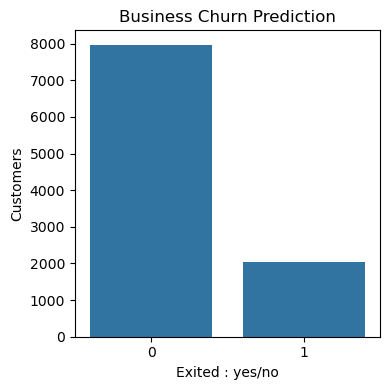

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Bar plot visualization")
plt.figure(figsize = (4,4))
sns.countplot(x= 'Exited', data= df)
plt.title("Business Churn Prediction")
plt.xlabel("Exited : yes/no")
plt.ylabel("Customers")
plt.tight_layout()
plt.show()

Bar plot visualization


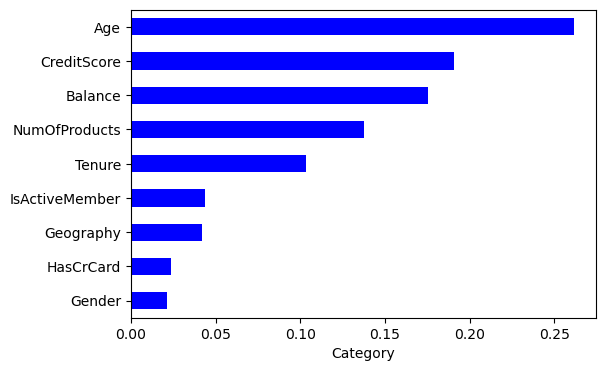

In [57]:
print("Bar plot visualization")
plt.figure(figsize = (6,4))
Category = pd.Series(rf_model.feature_importances_, index=x.columns)
Category.nlargest(10).sort_values().plot(kind='barh', color='blue')
plt.xlabel('Top 10 important Features')
plt.xlabel("Category")
plt.show()
